## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  77.950089   718.567425  0.576001  8.835298  421.127982
1  57.283721  1639.169736  0.118200  7.334067  201.945238
2  76.953486   770.333051  0.534835  9.840776  419.119626
3  78.834974  1432.407893  0.192040  8.580498  286.146179
4  46.771374   836.454035  0.447081  8.519034  376.939657


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9726469	total: 58ms	remaining: 57.9s
1:	learn: 0.9618486	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9532198	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9434771	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9308355	total: 60.3ms	remaining: 12s
5:	learn: 0.9221638	total: 60.8ms	remaining: 10.1s
6:	learn: 0.9104448	total: 61.3ms	remaining: 8.7s
7:	learn: 0.9002032	total: 61.8ms	remaining: 7.67s
8:	learn: 0.8871995	total: 62.3ms	remaining: 6.85s
9:	learn: 0.8779148	total: 62.7ms	remaining: 6.21s
10:	learn: 0.8648330	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8520530	total: 63.8ms	remaining: 5.26s
12:	learn: 0.8422147	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8310076	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8218556	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8132651	total: 65.6ms	remaining: 4.04s
16:	learn: 0.8019393	total: 66.1ms	remaining: 3.82s
17:	learn: 0.7925868	total: 66.5ms	remaining: 3.63s
18:	learn: 0.7850721	total: 67ms	remaining: 3.46s

106:	learn: 0.2983521	total: 106ms	remaining: 887ms
107:	learn: 0.2948008	total: 107ms	remaining: 883ms
108:	learn: 0.2927399	total: 107ms	remaining: 877ms
109:	learn: 0.2898053	total: 108ms	remaining: 872ms
110:	learn: 0.2884572	total: 108ms	remaining: 867ms
111:	learn: 0.2858880	total: 109ms	remaining: 863ms
112:	learn: 0.2834702	total: 109ms	remaining: 857ms
113:	learn: 0.2800655	total: 109ms	remaining: 851ms
114:	learn: 0.2768816	total: 110ms	remaining: 846ms
115:	learn: 0.2750428	total: 110ms	remaining: 841ms
116:	learn: 0.2721945	total: 111ms	remaining: 835ms
117:	learn: 0.2697145	total: 111ms	remaining: 831ms
118:	learn: 0.2666605	total: 112ms	remaining: 826ms
119:	learn: 0.2649700	total: 112ms	remaining: 822ms
120:	learn: 0.2624140	total: 113ms	remaining: 819ms
121:	learn: 0.2604351	total: 113ms	remaining: 814ms
122:	learn: 0.2580684	total: 114ms	remaining: 811ms
123:	learn: 0.2560200	total: 114ms	remaining: 806ms
124:	learn: 0.2546373	total: 115ms	remaining: 802ms
125:	learn: 

286:	learn: 0.0694096	total: 185ms	remaining: 461ms
287:	learn: 0.0688738	total: 186ms	remaining: 460ms
288:	learn: 0.0683980	total: 186ms	remaining: 459ms
289:	learn: 0.0679649	total: 187ms	remaining: 458ms
290:	learn: 0.0677253	total: 188ms	remaining: 457ms
291:	learn: 0.0672158	total: 188ms	remaining: 456ms
292:	learn: 0.0669681	total: 188ms	remaining: 455ms
293:	learn: 0.0665163	total: 189ms	remaining: 454ms
294:	learn: 0.0660647	total: 189ms	remaining: 453ms
295:	learn: 0.0658139	total: 190ms	remaining: 452ms
296:	learn: 0.0653765	total: 190ms	remaining: 451ms
297:	learn: 0.0649799	total: 191ms	remaining: 450ms
298:	learn: 0.0645807	total: 191ms	remaining: 449ms
299:	learn: 0.0642250	total: 192ms	remaining: 448ms
300:	learn: 0.0638455	total: 192ms	remaining: 447ms
301:	learn: 0.0635128	total: 193ms	remaining: 446ms
302:	learn: 0.0631303	total: 193ms	remaining: 445ms
303:	learn: 0.0627540	total: 194ms	remaining: 444ms
304:	learn: 0.0623920	total: 194ms	remaining: 443ms
305:	learn: 

522:	learn: 0.0244686	total: 288ms	remaining: 263ms
523:	learn: 0.0243571	total: 289ms	remaining: 262ms
524:	learn: 0.0243122	total: 289ms	remaining: 262ms
525:	learn: 0.0242031	total: 289ms	remaining: 261ms
526:	learn: 0.0241470	total: 290ms	remaining: 260ms
527:	learn: 0.0240284	total: 290ms	remaining: 259ms
528:	learn: 0.0239849	total: 291ms	remaining: 259ms
529:	learn: 0.0238801	total: 291ms	remaining: 258ms
530:	learn: 0.0238522	total: 291ms	remaining: 257ms
531:	learn: 0.0237448	total: 292ms	remaining: 257ms
532:	learn: 0.0236428	total: 292ms	remaining: 256ms
533:	learn: 0.0235798	total: 293ms	remaining: 255ms
534:	learn: 0.0235183	total: 293ms	remaining: 255ms
535:	learn: 0.0234580	total: 293ms	remaining: 254ms
536:	learn: 0.0233990	total: 294ms	remaining: 253ms
537:	learn: 0.0232990	total: 294ms	remaining: 253ms
538:	learn: 0.0232412	total: 294ms	remaining: 252ms
539:	learn: 0.0232146	total: 295ms	remaining: 251ms
540:	learn: 0.0231582	total: 295ms	remaining: 251ms
541:	learn: 

710:	learn: 0.0129273	total: 368ms	remaining: 149ms
711:	learn: 0.0129101	total: 369ms	remaining: 149ms
712:	learn: 0.0128282	total: 369ms	remaining: 149ms
713:	learn: 0.0128005	total: 370ms	remaining: 148ms
714:	learn: 0.0127445	total: 370ms	remaining: 148ms
715:	learn: 0.0127175	total: 371ms	remaining: 147ms
716:	learn: 0.0126912	total: 371ms	remaining: 146ms
717:	learn: 0.0126744	total: 371ms	remaining: 146ms
718:	learn: 0.0126578	total: 372ms	remaining: 145ms
719:	learn: 0.0125786	total: 372ms	remaining: 145ms
720:	learn: 0.0125510	total: 373ms	remaining: 144ms
721:	learn: 0.0125152	total: 373ms	remaining: 144ms
722:	learn: 0.0124380	total: 374ms	remaining: 143ms
723:	learn: 0.0123807	total: 374ms	remaining: 143ms
724:	learn: 0.0123281	total: 374ms	remaining: 142ms
725:	learn: 0.0122821	total: 375ms	remaining: 141ms
726:	learn: 0.0122281	total: 375ms	remaining: 141ms
727:	learn: 0.0121541	total: 375ms	remaining: 140ms
728:	learn: 0.0121097	total: 376ms	remaining: 140ms
729:	learn: 

948:	learn: 0.0062056	total: 471ms	remaining: 25.3ms
949:	learn: 0.0061884	total: 472ms	remaining: 24.8ms
950:	learn: 0.0061728	total: 472ms	remaining: 24.3ms
951:	learn: 0.0061688	total: 472ms	remaining: 23.8ms
952:	learn: 0.0061484	total: 473ms	remaining: 23.3ms
953:	learn: 0.0061164	total: 473ms	remaining: 22.8ms
954:	learn: 0.0061020	total: 474ms	remaining: 22.3ms
955:	learn: 0.0060895	total: 474ms	remaining: 21.8ms
956:	learn: 0.0060787	total: 474ms	remaining: 21.3ms
957:	learn: 0.0060671	total: 475ms	remaining: 20.8ms
958:	learn: 0.0060580	total: 475ms	remaining: 20.3ms
959:	learn: 0.0060454	total: 476ms	remaining: 19.8ms
960:	learn: 0.0060415	total: 477ms	remaining: 19.3ms
961:	learn: 0.0060229	total: 477ms	remaining: 18.8ms
962:	learn: 0.0060032	total: 477ms	remaining: 18.3ms
963:	learn: 0.0059839	total: 478ms	remaining: 17.8ms
964:	learn: 0.0059750	total: 478ms	remaining: 17.3ms
965:	learn: 0.0059627	total: 479ms	remaining: 16.8ms
966:	learn: 0.0059437	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

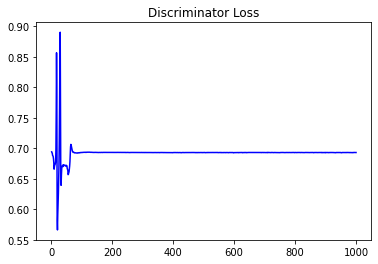

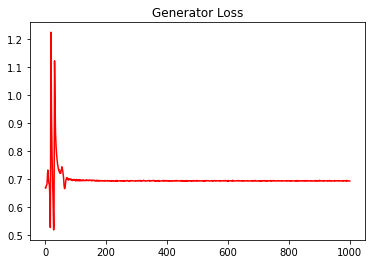

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.015882249484823474


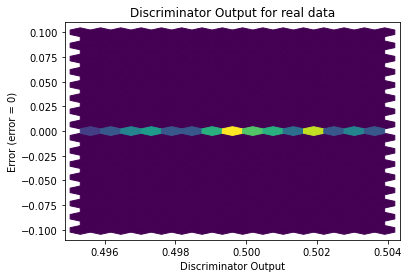

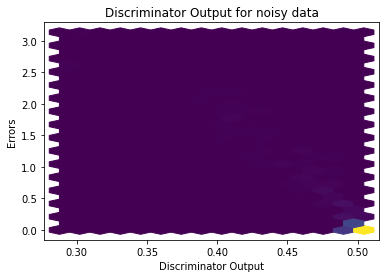

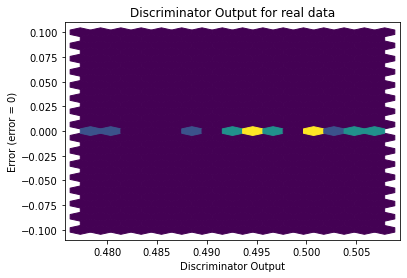

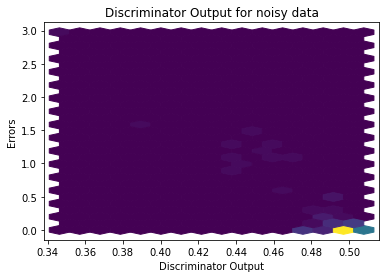

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


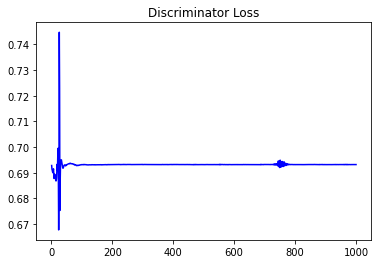

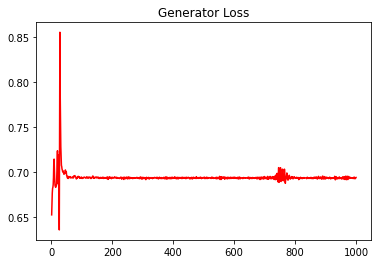

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03853450331351311


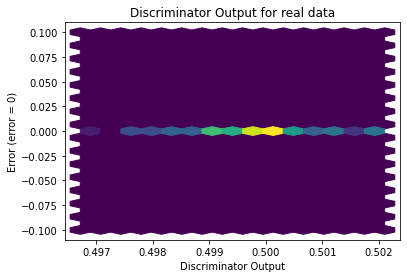

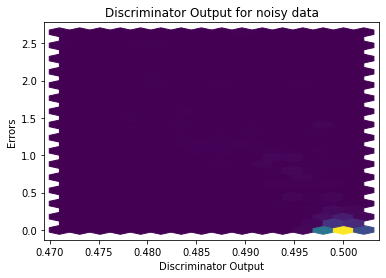

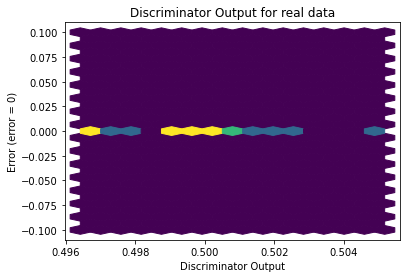

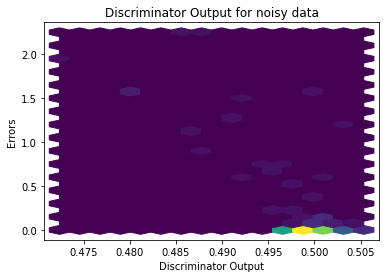

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3251]], requires_grad=True)
